# RK2.VS.Leap-Frog.VS.Verlet

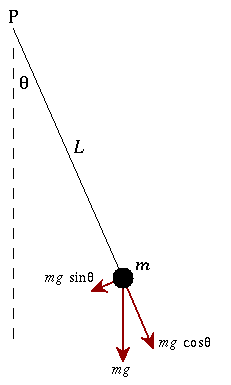

In [1]:
from IPython.display import Image
Image("nonLinearPendulum.gif")

### Péndulo no lineal
El desplazamiento del brazo en la posición vertical está dado en términos de $\theta$ y su dirección tangencial es $l\frac{d^2\theta}{dt^2}$.

$$
ml\frac{d^2\theta}{dt^2} = -mg sin(\theta)
$$

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l} sin(\theta)
$$

Expresando la ecuación de segundo órden como dos ecuaciones diferenciales de primer órden.

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -\frac{g}{l}sin\theta
$$


### Ejercicio

Escribir la expresion para la energía en términos de los parametros del péndulo

$$E = \frac{ml^2 \dot{\theta}^2}{2}+mgl(1-cos\theta)$$

### Ejercicio

Generaliza la expresión de la energía inicial en todos los códigos

## RK2

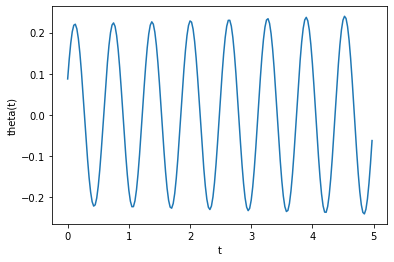

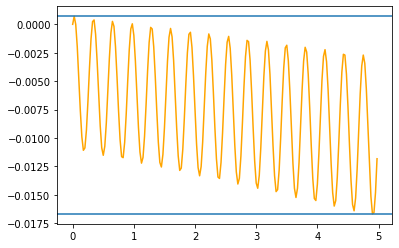

In [2]:
#Runge-Kutta orden 2 pendulo
from pylab import *
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
lista_omega = []

#Cambio la velocidad inicial a 2
r = array([5/180*pi,2],float)
for t in lista_t:
    lista_theta.append(r[0])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    r+=k2
    lista_omega.append(r[1])

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
#Generalizo la energia aquí:
inicial_0=m*g*l*(1-cos(lista_theta[0])) + m * l**2 * (lista_omega[0])**2 / 2
for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()


## Leap-Frog

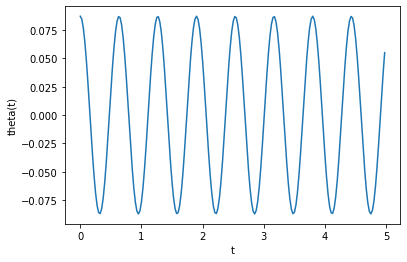

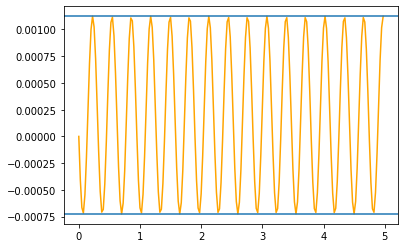

In [8]:
#Solución de Leap-Frog
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
lista_omega = []

#r = array([179/180*pi,0],float)
r = array([5/180*pi,0],float)
rH = r+0.5*h*f(r,0)
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*f(rH,t+0.5*h)
    rH+=h*f(r,t+h)
    lista_omega.append(r[1])
    
plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
#Generalizo la energia inicial aqui
inicial_0=m*g*l*(1-cos(lista_theta[0])) + m * l**2 * (lista_omega[0])**2 / 2

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

    
dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()

## Verlet

Supongamos que queremos usar leapfrog para resolver ecuaciones clásicas de movimiento para un sistema físico dado. Si usamos podemos expresar la seguna ley de Newton de la siguiente forma:

$$
\frac{d^2x}{dt^2} = f(x,t)
$$

Luego convertimos este sistema de ecuaciones de movimiento a ecuaciones diferenciales acopladas de primer orden:

$$
\frac{dx}{dt}=v, \frac{dx}{dt}=f(x,t) 
$$

Usamos $v$ para recordar que hablamos de un sistema fîsico.

Ahora si tenemos $x$ a un tiempo $t$ y v a un tiempo $t+\frac{1}{2}h$. Entonces iterando sobre las siguientes expresiones:

$$
x(t+h) = x(t) + hv(t+\frac{1}{2}h)\\
v(t+\frac{3}{2}h)=v(t+\frac{1}{2}h)+hf(x(t+h), t+h)
$$

Obtenemos $x$ a cualquier tiempo que deseemos, y en consecuencia tambien la $t$ pero siempre desfasada un medio de $h$. Dependiendo del sistema y el tamaño del paso medir la energía con velocidad desfasada involucra una pequeña impresición. Para conocer energía a un tiempo determinado tenemos que realizar operaciones extras en la velocidad.

Digamos que si tenemos la velocidad a un tiempo $t+h$, simplemente hacemos un paso medio para atrás usando el método de Euler para tenerlo en el tiempo $t+\frac{1}{2}h$:

$$
v(t+\frac{1}{2}h) = v(t+h) - \frac{1}{2}h f(x(t+h),t+h)
$$

Reacomodando:

$$
v(t+h) = v(t+\frac{1}{2}h) + \frac{1}{2}h f(x(t+h),t+h)
$$

Lo cual nos permite saber en pasos enteros de $h$ la velocidad. De esta forma si conocemos los valores iniciales $x,v$ a algûn tiempo $t$ entonces:

$$
v(t+\frac{1}{2}h) = v(t) + \frac{1}{2}h f(x(t),t)
$$

Y a partir de ahí aplicamos de forma iterativa:

$$
x(t+h) = x(t) + hv(t+\frac{1}{2}h),\\
k=hf(x(t+h), t+h),\\
v(t+h) = v(t+\frac{1}{2}h)+\frac{1}{2}k,\\
v(t+\frac{3}{2}h) = v(t+\frac{1}{2}h)+k
$$



### Ejercicio

Generalizar a ecuaciones de movimiento en más de una dimensión.

Tenemos el sistema ODE:
$$\frac{d^2\vec{r}}{dt^2} = \vec{f}(\vec{r},t)$$

Que podemos llevar a primer orden de la forma:


$$
\frac{d\vec{r}}{dt}=\vec{v}, \frac{d\vec{r}}{dt}=\vec{f}(\vec{r},t) 
$$


La forma vectorial de las ecuaciones anteriores es:

$$
\vec{r}(t+h) = \vec{r}(t) + h\vec{v}(t+\frac{1}{2}h),\\
k=h\vec{f}(\vec{r}(t+h), t+h),\\
\vec{v}(t+h) = \vec{v}(t+\frac{1}{2}h)+\frac{1}{2}k,\\
\vec{v}(t+\frac{3}{2}h) = \vec{v}(t+\frac{1}{2}h)+k
$$


### Ejercicio

Agregar una gráfica del espacio fase usando multiples condiciones iniciales (cambia v!). Y describe el sistema.

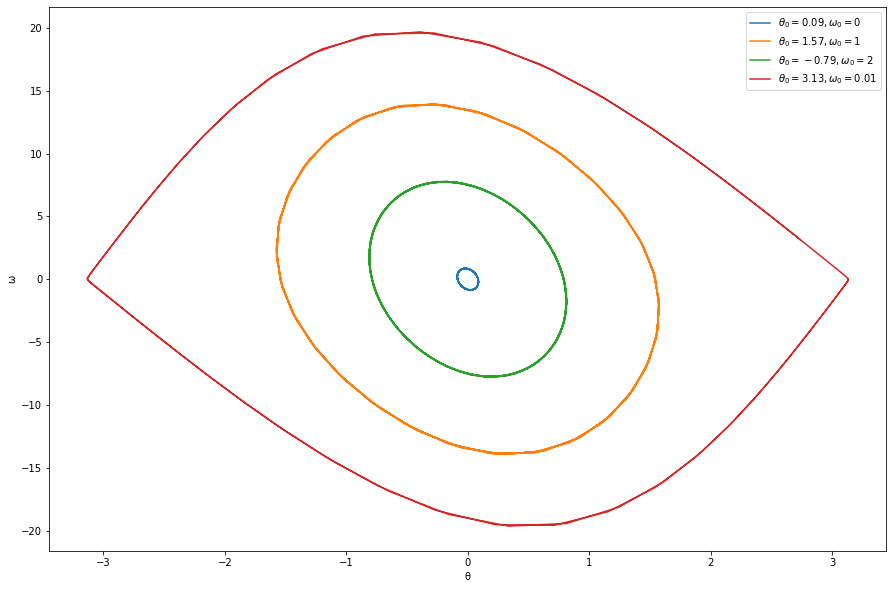

In [124]:
#Verlet
from pylab import *
rcParams['figure.figsize'] = (15,10)
def phase_space(theta0,omega0):
    
    """Devuelve theta y omega correspondientes a las condiciones iniciales theta0, omega0"""

    g=9.81
    l=0.1
    def f(r,t):
        theta=r[0]
        omega=r[1]
        ftheta=omega
        fomega=(-g/l)*sin(theta)
        return array([ftheta,fomega],float)

    a = 0.0
    b = 5.0
    N = 200
    h = (b-a)/N

    lista_t = arange(a,b,h)
    lista_theta = []
    lista_omega = []

    r = array([theta0,omega0],float) #condiciones iniciales

    rH = r+0.5*h*f(r,0) #inicio paso intermedio
    for t in lista_t:
        lista_theta.append(r[0])
        r+=h*f(rH,t+0.5*h)
        k=h*f(r,t+h)
        v=rH+0.5*k
        rH+=h*f(r,t+h)
        lista_omega.append(v[1])
    
    return lista_theta,lista_omega

#Plot espacio fase.

iniciales= [(5/180*pi,0),(pi/2,1),(-pi/4,2),(pi-0.01,0.01)]
for condiciones in iniciales:
    lista_theta,lista_omega = phase_space(*condiciones)
    plot(lista_theta,lista_omega,label=f'$θ_0={condiciones[0]:.2f},\omega_0={condiciones[1]}$')
    xlabel('θ'); ylabel('ω');
    legend()

El espacio fase muestra distintos ciclos límite. La coordenada (0,0) corresponde a un punto fijo elíptico pues las órbitas cercanas a el son elipticas. 

Se debe notar que no es punto fijo estable i.e. no es un atractor a pesar de ser estable en el sentido de lyapunov. A estos puntos se les llama puntos fijos neutrales. Lo anterior es así debido a que no no hay disipación de energía y las orbitas cercanas decaen a el punto fijo haciendolo no atractor. 

Existen otro puntos fijo en la coordenada (pi,0) que es un punto fijo hiperbólico. 

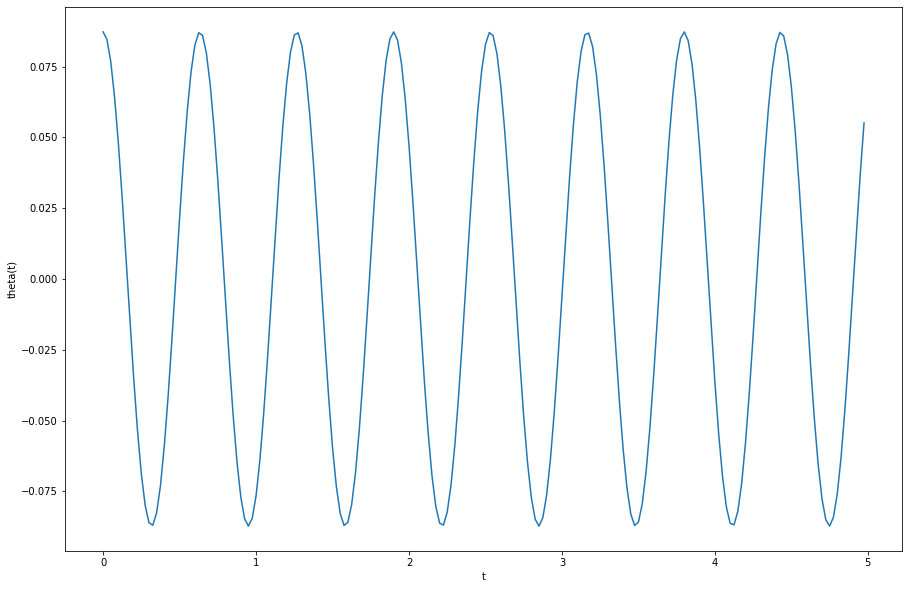

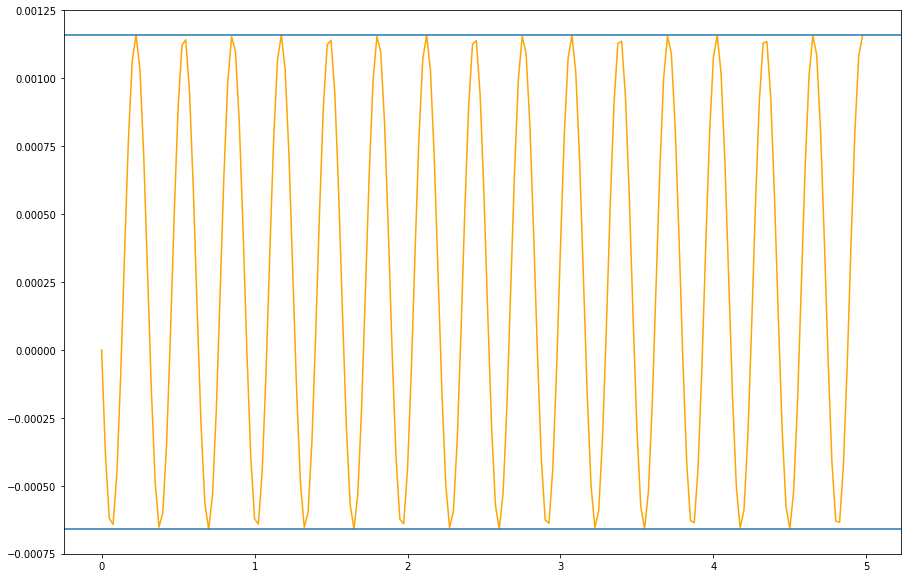

In [125]:
#Verlet
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
lista_omega = []

r = array([5/180*pi,0],float) #condiciones iniciales
rH = r+0.5*h*f(r,0) #inicio paso intermedio
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*f(rH,t+0.5*h)
    k=h*f(r,t+h)
    v=rH+0.5*k
    rH+=h*f(r,t+h)
    lista_omega.append(v[1])
    
plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
#Generalizo la energia aquí:
inicial_0=m*g*l*(1-cos(lista_theta[0])) + m * l**2 * (lista_omega[0])**2 / 2

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()

## Reversibilidad temporal

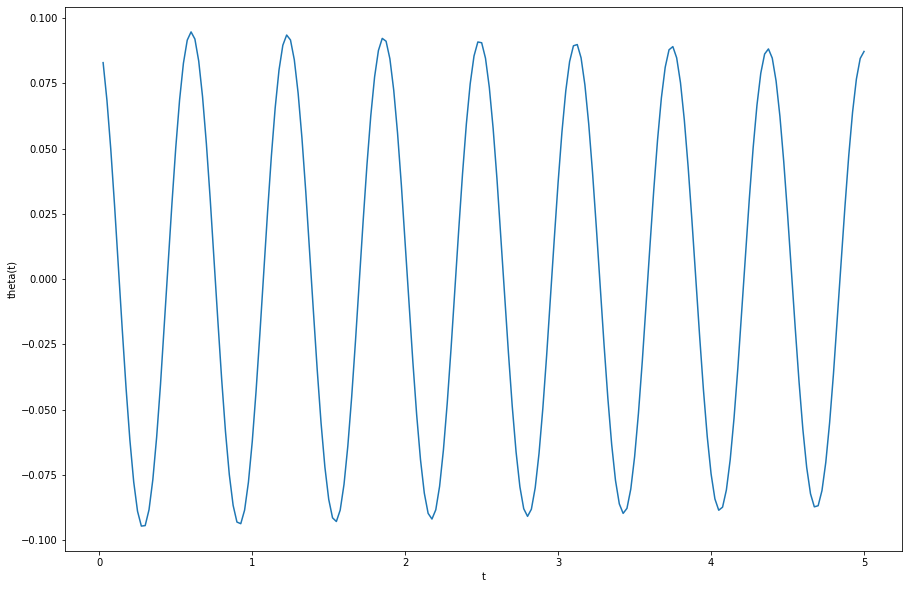

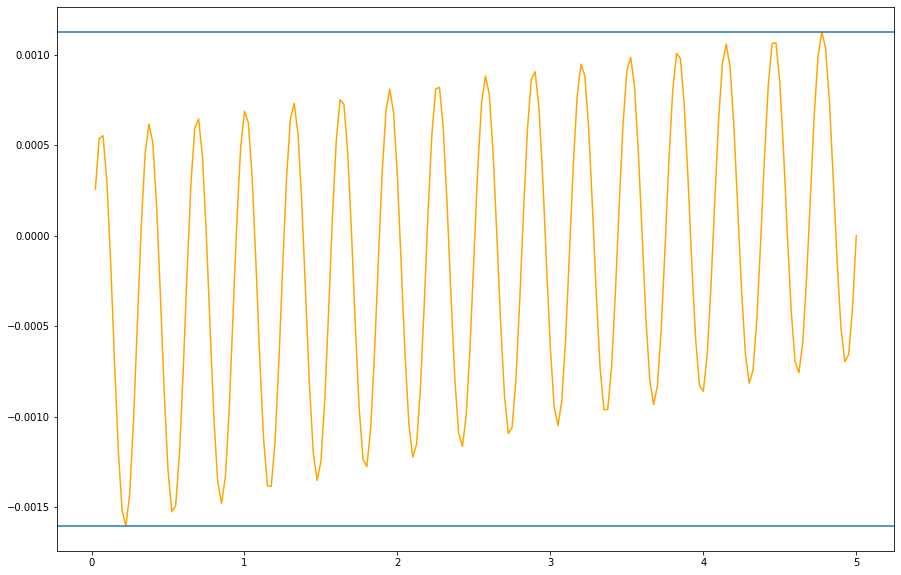

In [126]:
#Runge-Kutta orden 2 pendulo
from pylab import *
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200
h = (b-a)/N

lista_t = arange(b,a,-h)
lista_theta = []
lista_omega = []

#r = array([179/180*pi,0],float)
r = array([5/180*pi,0],float)

for t in lista_t:
    lista_theta.append(r[0])
    k1=-h*f(r,t)
    k2=-h*f(r+0.5*k1,t-0.5*h)
    r+=k2
    lista_omega.append(r[1])

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
#Generalizo la energia aquí:
inicial_0=m*g*l*(1-cos(lista_theta[0])) + m * l**2 * (lista_omega[0])**2 / 2

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()


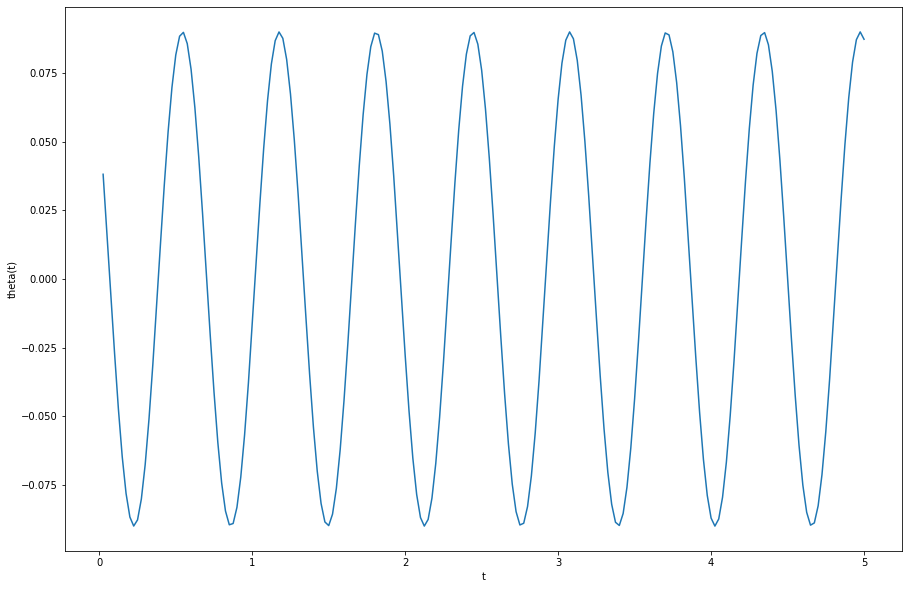

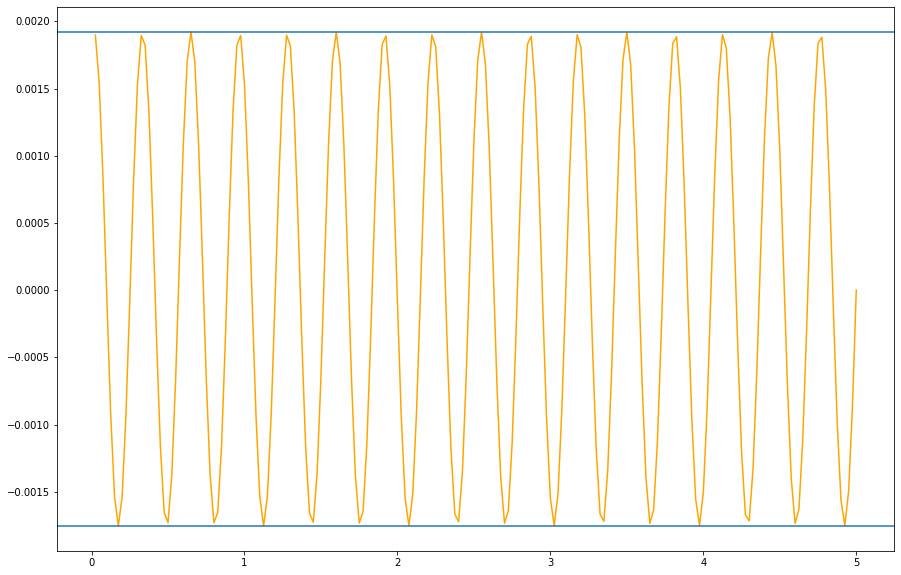

In [127]:
#Solución de Leap-Frog
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 5.0
N = 200 
h = (b-a)/N

lista_t = arange(b,a,-h)
lista_theta = []
lista_omega = []

#r = array([179/180*pi,0],float)
r = array([5/180*pi,0],float)
rH = r+0.5*h*f(r,0)
for t in lista_t:
    lista_theta.append(r[0])
    r-=h*f(rH,t-0.5*h)
    rH-=h*f(r,t-h)
    lista_omega.append(r[1])
    
plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

E=[]
m=1
#Generalizo la energia aquí:
inicial_0=m*g*l*(1-cos(lista_theta[0])) + m * l**2 * (lista_omega[0])**2 / 2

for i in range(len(lista_t)):
    cinetica=(m*(l**2)*(lista_omega[i])**2)/(2)
    potencial=m*g*l*(1-cos(lista_theta[i]))
    energia=inicial_0-(cinetica+potencial)
    E.append(energia)

    
dE_max=(max(E))
dE_min=(min(E))
plot(lista_t,E,'orange')
axhline(y=dE_max)
axhline(y=dE_min)
show()

### Ejercicio
Orbita de la tierra alrededor del sol.

1) Investiga los parámetros relevantes para el sistema tierra sol.

2) Establece la ecuación diferencial vectorial ($\mathbf{r}=(x,y)$) de segundo orden para este sistema.

3) Resuelve numéricamente, usando Verlet, el sistema tierra sol calculando la orbita de la tierra (usa pasos de una hora)

4) Grafica la energía total en función del tiempo.

1. Los parametros relevantes son la **masa de la tierra (aunque se va a despreciar)**, la **masa del sol** y la **constante de gravitacion universal** aunque es solo una constante que en realidad no la consideraria un parametro pero como es tarea la pongo. Voy a tratar el problema como un problema de dos cuerpos reducido a el de un cuerpo considerando que uno es mucho mas masivo que el otro y por lo tanto no afecta en su movimiento. I.e. el sol esta fijo y la tierra orbita alrededor.

Las coordenadas relevantes en este esquema son las posiciones **y** y **x** en un sistema coordenado cartesiano.

2. Empezamos por la fuerza de gravitacion universal:

$$F = \frac{Gm_1m_2}{r^2}$$

El radio es $r = \sqrt{x^2+y^2}$

Sea $m_1$ la masa de la tierra y $m_2$ la del sol, entonces la fuerza en la tierra debida a el sol es:

$$(F_x,F_y) = (\frac{Gm_1m_2}{x^2+y^2}\frac{-x}{\sqrt{x^2+y^2}},\frac{Gm_1m_2}{x^2+y^2}\frac{-y}{\sqrt{x^2+y^2}})$$

Usando la ley de newton obtenemos el sistema de ecuaciones de segundo orden a resolver:

$$m_1\ddot{x} = -\frac{Gm_1m_2x}{(x^2+y^2)^{3/2}} \\
m_1\ddot{y} = -\frac{Gm_1m_2y}{(x^2+y^2)^{3/2}}$$

Necesitamos expresar el sistema en uno de 4 ecuaciones de primer orden:

$$\dot{x} = v_x\\
\dot{v_x} = -\frac{Gm_2x}{(x^2+y^2)^{3/2}} \\
\dot{y} = v_y\\
\dot{v_y} = -\frac{Gm_2y}{(x^2+y^2)^{3/2}}$$

In [67]:
x,y,E = [],[],[]


# Constants
G = 6.67408e-11 # m^3 kg^-1 s^-2
t = 0.0 # s
dt = 0.01*24*60*60 # s
 

#Sun mass
m_s = 1.989e30 # kg

# Earth Parameters

#Earth mass
m_e=5.972e24 #kg

# position
x_e = 1.5e11 # m
y_e = 0

# velocity
vx_e = 0
vy_e = 30000 # m/s


def a(r,t): 
    
    x,y = r[0],r[1]
    
    # Distance
    r_12 = np.sqrt((x)**2 + (y)**2) # m
    

    # aceleration
    ax = -(G*m_s*(x))/r_12**3
    ay = -(G*m_s*(y))/r_12**3
    
    return np.array([ax,ay],float)


r_oldpos = np.array([x_e,y_e],float) #inital position earth

r_pos = r_oldpos + np.array([vx_e,vy_e],float)*dt

E_0 = 0.5*m_e*dot(np.array([vx_e,vy_e],float),np.array([vx_e,vy_e],float)) - G*m_e*m_s/np.sqrt(dot(r_pos,r_pos))

while t<4*377*24*60*60: # record 4 years of movement
    x.append(r_pos[0])
    y.append(r_pos[1])
    
    #verlet integration 
    force = m*a(r_pos,t)
    olderpos = r_oldpos
    r_oldpos = r_pos
    r_pos = 2*r_pos - olderpos + force*dt**2/m
    
    # work out the energy using a centered derivative
    # for the velocity:
    velocity = (r_pos - olderpos)/dt
    kineticEnergy = 0.5*m_e*dot(velocity,velocity)
    potentialEnergy = -G*m_e*m_s/np.sqrt(dot(r_pos,r_pos))
    
    total_energy = kineticEnergy+potentialEnergy
    E.append(E_0-total_energy)

    t += dt

Text(0, 0.5, 'Total energy')

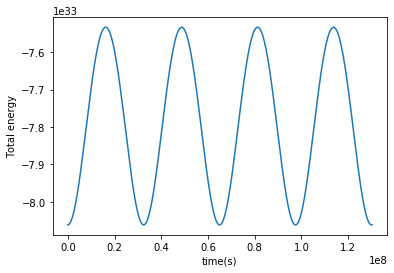

In [68]:
time = np.arange(0.0,4*377*24*60*60,dt)
plt.plot(time,E)
plt.xlabel('time(s)')
plt.ylabel('Total energy')

Text(0.5, 1.0, "Earth's orbit")

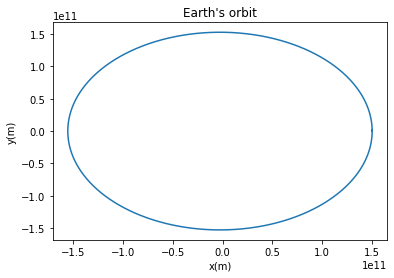

In [53]:
plt.plot(x,y)
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.title('Earth\'s orbit')

Lo anterior es correcto ya que según [wikipedia](https://en.wikipedia.org/wiki/Apse_line):

An apse line, or line of apsides, is an imaginary line defined by an orbit's eccentricity vector. It is strictly defined for elliptic, parabolic, and hyperbolic orbits.

For such orbits the apse line is found:[1]

for elliptical orbits – between the orbit's periapsis and apoapsis (also known as the major axis)

 1. "Line of apsides – Astronomy". Encyclopædia Britannica. Retrieved 23 August 2015.


Revisando la página de [wikipedia de la órbita de la tierra](https://en.wikipedia.org/wiki/Earth%27s_orbit):

+ aphelion: 152.10×106 km
+ perihelion: 147.10×106 km

Entonces the apse line para la órbita de la tierra es de longitud:
$152.10×10^6 km + 147.10×10^6 km = 299.20x10^6 km \simeq 300x10^9 m $

In [51]:
(abs(min(x))+max(x))/1e9

305.17847824026205

In [ ]:
E = 